# Image Classification using CNN on fmnist dataset:

In [1]:
# Fmnist Dataset:

# import libraries:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# check the tensorflow version
print(tf.__version__)

2.18.0


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
# Load the fmnist data:
fasion_mnist  = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(fasion_mnist [1][1].shape)

(10000,)


In [6]:
# load the fmnist dataset

fasion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# seprating the training images from the test images and labels
(train_images, train_labels), (test_images, test_labels) = fasion_mnist

In [7]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', train_labels.shape)

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (60000,)


Text(0.5, 0, '5')

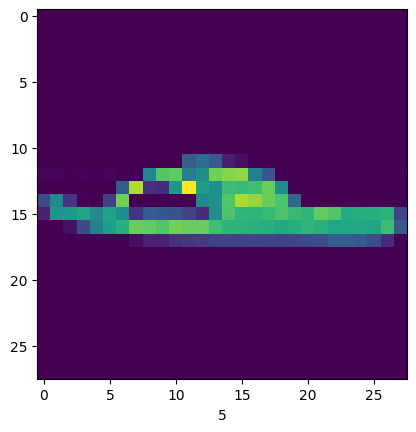

In [8]:
plt.imshow(train_images[59001])
plt.xlabel(train_labels[59001])

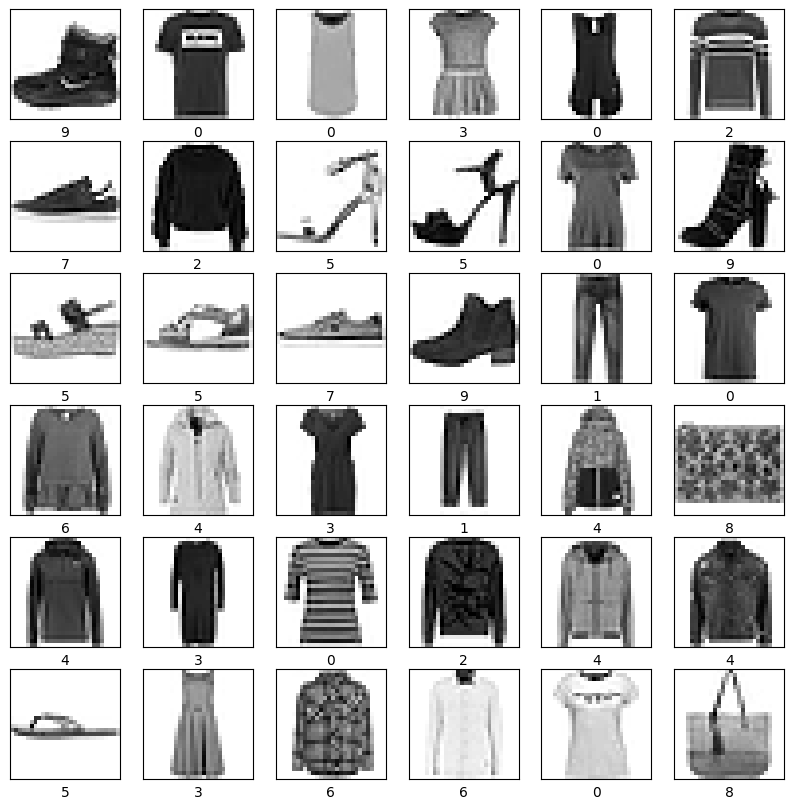

In [9]:
import tensorflow as tf
from tensorflow import keras  # Import Keras properly

# Display some sample images
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()


In [10]:
len(train_images)

60000

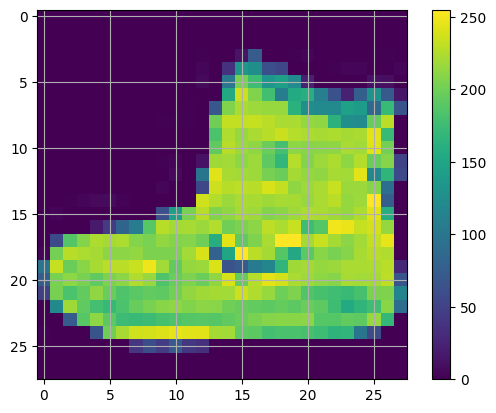

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()


In [12]:
# Display the value of each pixel in the image:
print('pixel value:')
for row in train_images[0]:
    for pixel in row:
        print('{:3}'.format(pixel), end=" ")
    print()

pixel value:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215

# Standardizing the data:

In [13]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

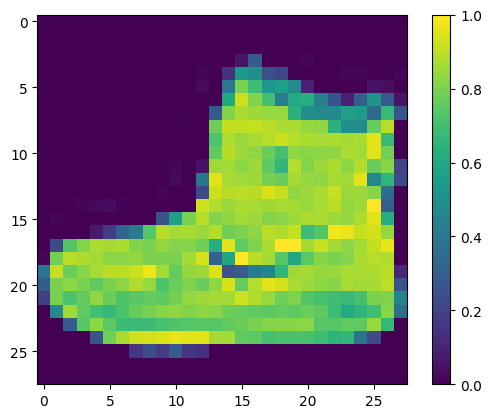

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

pixel value:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.0 0.051 0.286 0.0 0.0 0.00392 0.0157 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0118 0.0 0.141 0.533 0.498 0.243 0.212 0.0 0.0 0.0 0.00392 0.0118 0.0157 0.0 0.0 0.0118 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0235 0.0 0.4 0.8 0.69 0.525 0.565 0.482 0.0902 0.0 0.0 0.0 0.0 0.0471 0.0392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.608 0.925 0.812 0.698 0.42 0.612 0.631 0.427 0.251 0.0902 0.302 0.51 0.282 0.0588 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.271 0.812 0.875 0.855 0.847 0.847 0.639 0.

<Figure size 640x480 with 0 Axes>

<Axes: >

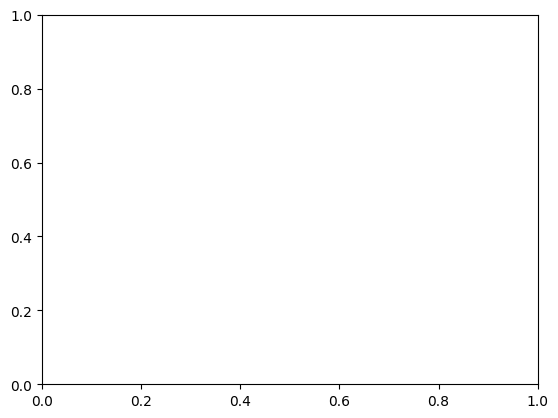

In [15]:
# # Round up each pixel value:
# train_images[0] = train_images[0].round(3)
# test_images[0] = test_images[0].round(3)

# Display the value of each pixel in the image:
print('pixel value:')
for row in train_images[0]:
    for pixel in row:
        print('{:0.3}'.format(pixel), end=" ")
    print()
display(plt.gcf())
display(plt.gca())

# Reshape the images to have a channel dimension:

In [16]:
# Reshape the images to have a channel dimension:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# create the model:

In [17]:
import tensorflow as tf
from tensorflow import keras

# Create the model:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),                                           # input layer
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),          # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),                                     # pooling layer
    # tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),          # convolutional layer
    # tf.keras.layers.MaxPooling2D(),                                                     # pooling layer
    tf.keras.layers.Flatten(),                                                          # flatten layer
    tf.keras.layers.Dense(10, activation='softmax')                                     # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,410 (40.66 KB)

 Trainable params: 10,410 (40.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# train the model:
model.fit(train_images, train_labels, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.7522 - loss: 0.7139 - val_accuracy: 0.8510 - val_loss: 0.4217
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8610 - loss: 0.3956 - val_accuracy: 0.8650 - val_loss: 0.3758
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8728 - loss: 0.3623 - val_accuracy: 0.8761 - val_loss: 0.3479
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8822 - loss: 0.3377 - val_accuracy: 0.8790 - val_loss: 0.3354
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8854 - loss: 0.3224 - val_accuracy: 0.8846 - val_loss: 0.3238
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8896 - loss: 0.3126 - val_accuracy: 0.8802 - val_loss: 0.3346
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.8951 - loss: 0.2947 - val_accuracy: 0.8848 - val_loss: 0.3175
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8974 - loss: 0

In [19]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.8904 - loss: 0.3107

Test loss: 0.31065332889556885

Test accuracy: 0.8903999924659729


In [21]:
# save the model
model.save('models/fashion_mnist_model.h5')

In [24]:
# Make predictions:
test_images.shape

(10000, 28, 28, 1)

In [25]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [26]:
test_labels[50]

np.uint8(4)

In [27]:
predictions[0]

array([2.7385414e-07, 5.5385801e-08, 1.5706944e-06, 2.7412119e-07,
       6.9815826e-07, 3.6986095e-03, 1.3901554e-05, 4.2791185e-03,
       5.1791908e-04, 9.9148756e-01], dtype=float32)

In [28]:
np.argmax(predictions[50])

np.int64(4)

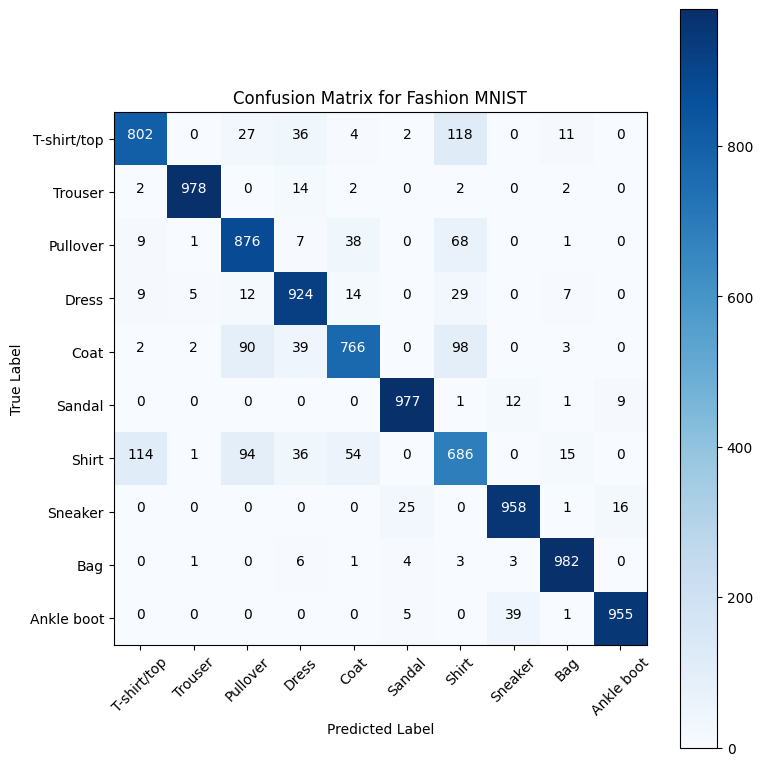

In [29]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


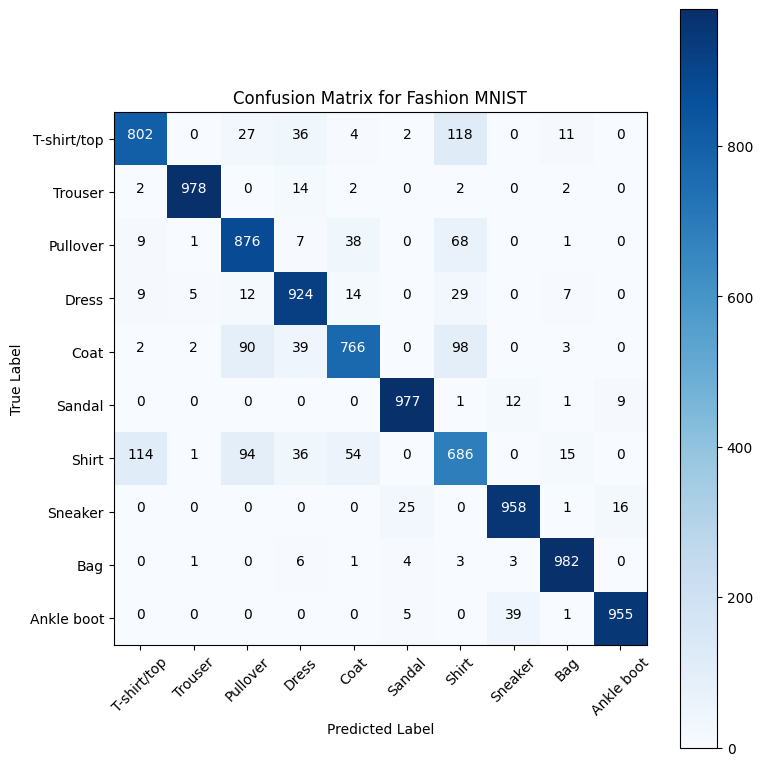

In [30]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()